In [5]:
from graph_rules import *
from update_rules import *
from sympy import primerange, factorint, isprime
import pandas as pd
import networkx as nx # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

In [16]:
g = build_graph(prime_collatz, range(2, 100), 100)

In [54]:
def display(node):
    if node > 1:
        fs = factorint(node)
        min_factor = min(fs.keys())
        max_factor = max(fs.keys())
        return (np.log(node/min_factor), np.log(node/max_factor))
    else:
        return (0, 0)

def layouter(g):
    pos = dot_layout(g) #{k: display(k) for k in g.nodes}
    return nx.spring_layout(g, pos=pos, k=1, iterations=100)

drawer = GraphDrawer\
        .create_default(figsize=(30, 15), node_size=1000, arrow_size=10, font_size=10, colorizer=color_by_primality)\

# drawer.layouter = layouter
drawer.graph_displayer.edge_displayer = create_edge_displayer(arrow_size=10, node_size=1000, arrowstyle="-|>", connectionstyle="arc3,rad=0.1")


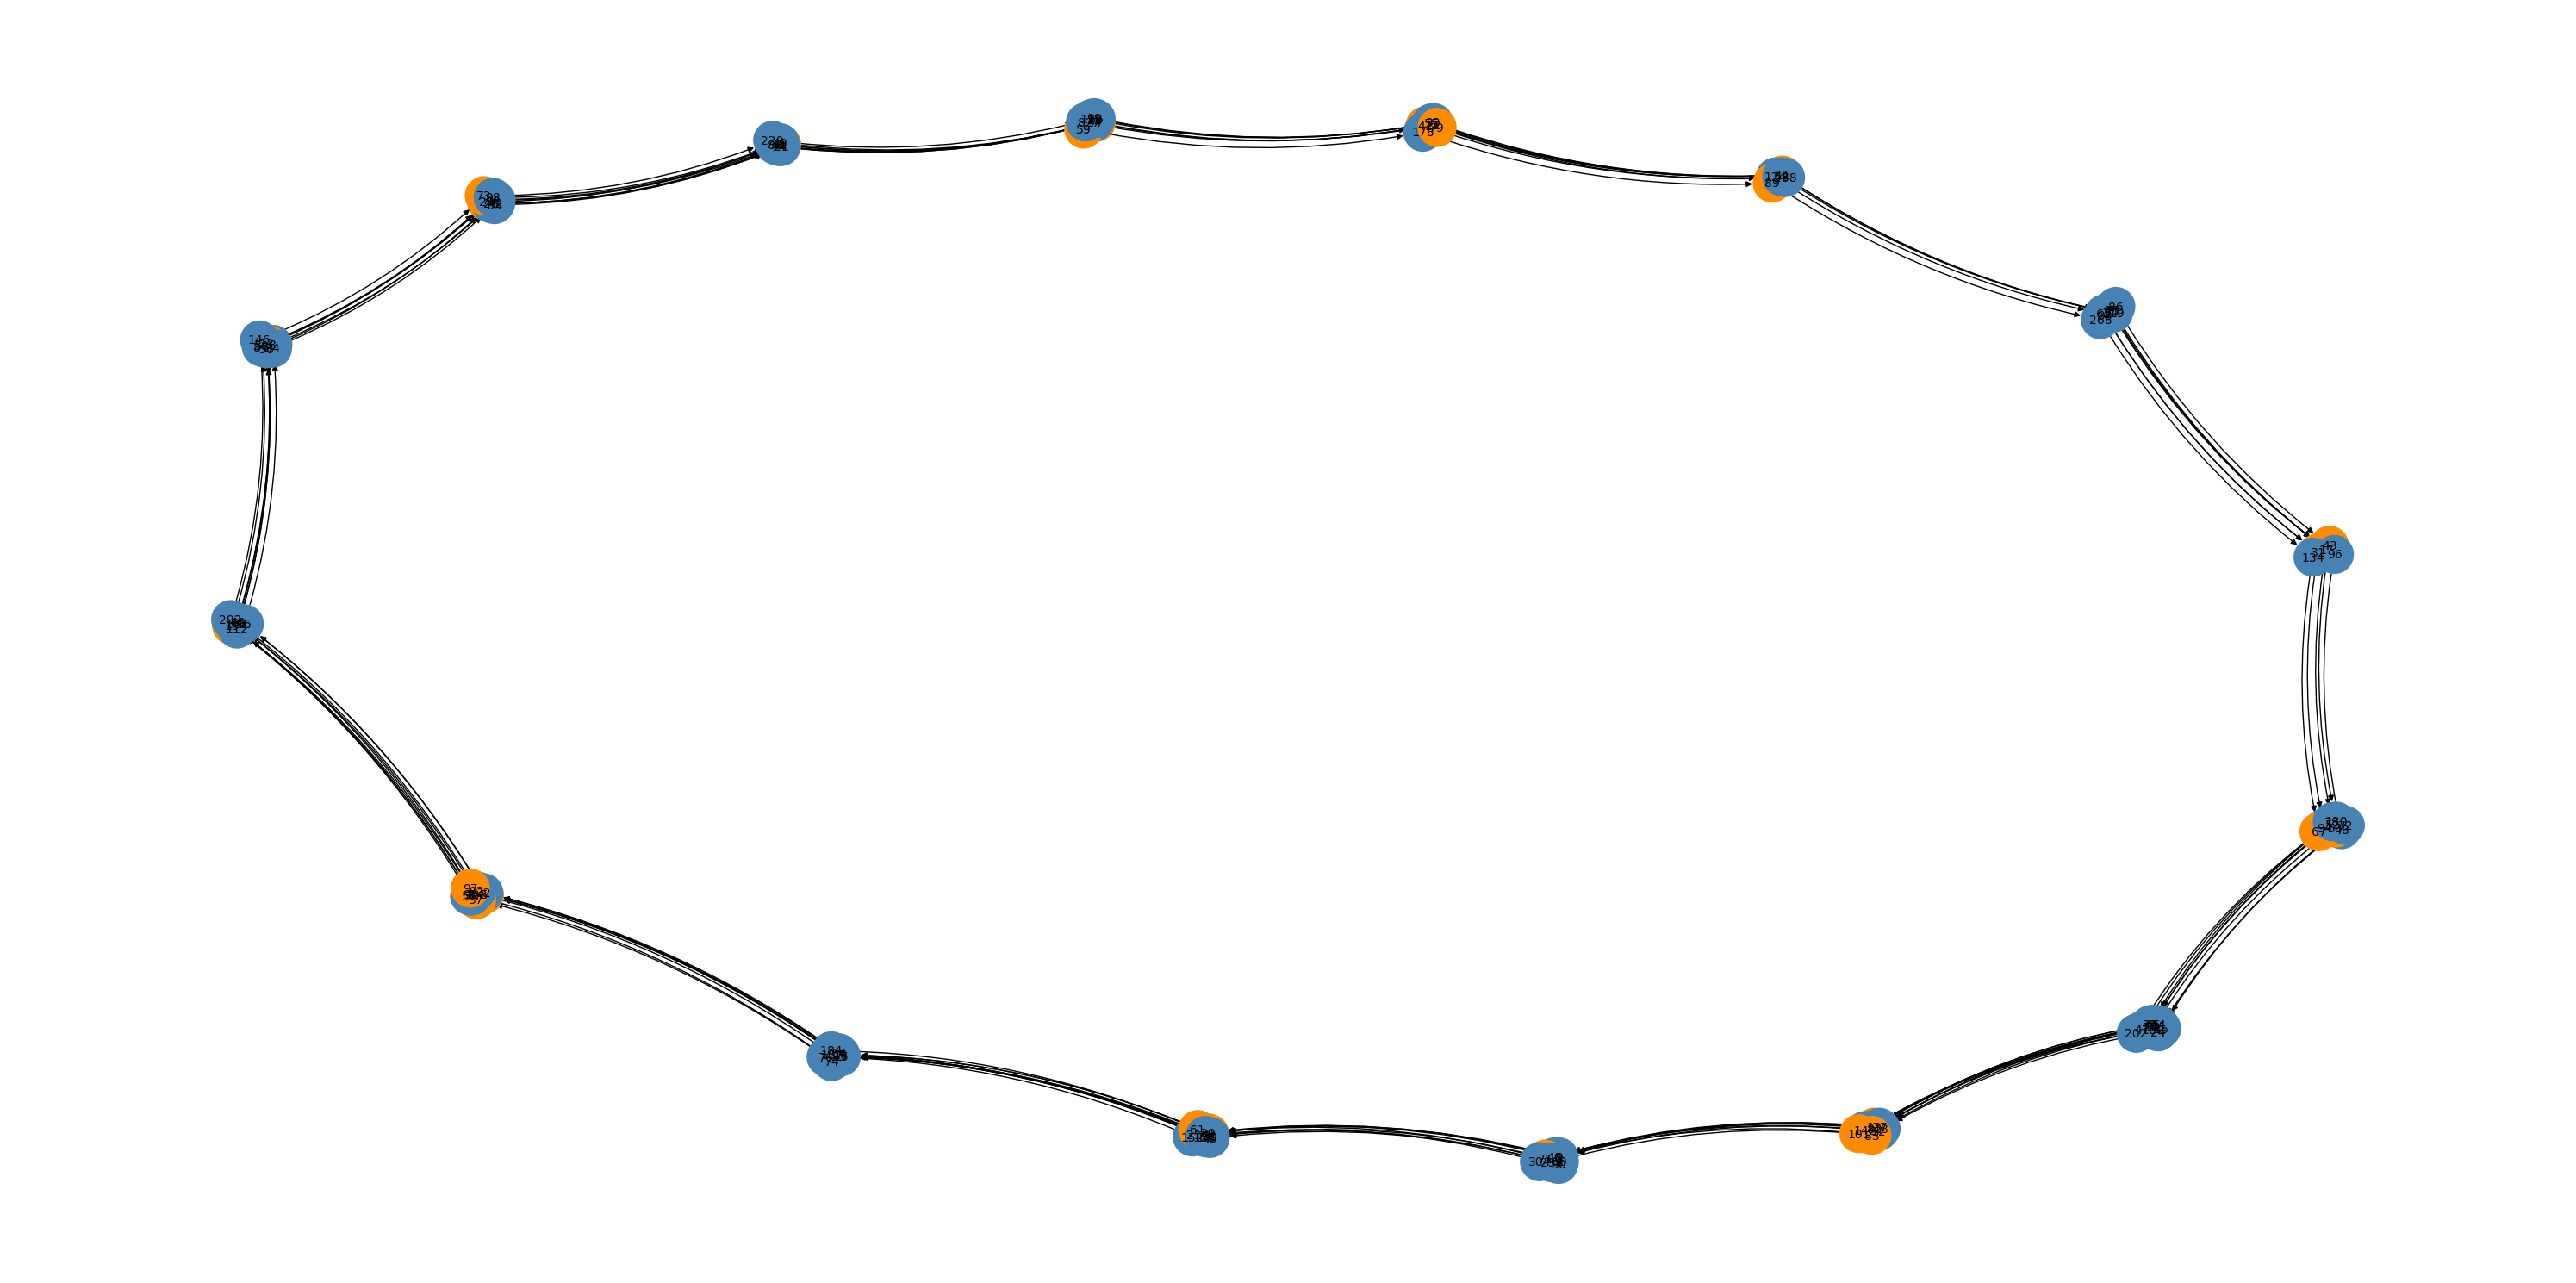

In [55]:
fig = drawer.draw(g)

In [15]:
in_degree = pd.Series({k: v for (k, v) in g.in_degree()}, name="in_degree")
# out_degree = pd.Series({k: v for (k, v) in g.out_degree()}, name="out_degree") # it's always 1
df = pd.DataFrame([in_degree]).T

<AxesSubplot: >

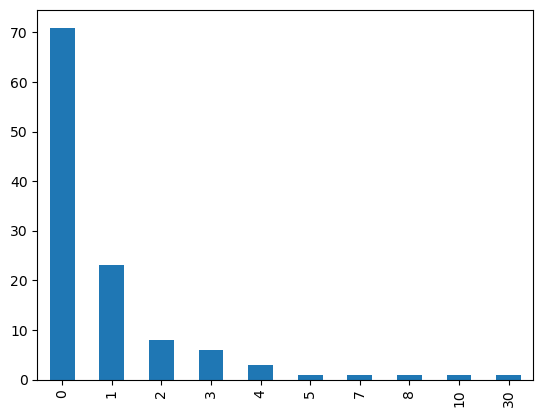

In [16]:
df.in_degree.value_counts().sort_index().plot.bar()

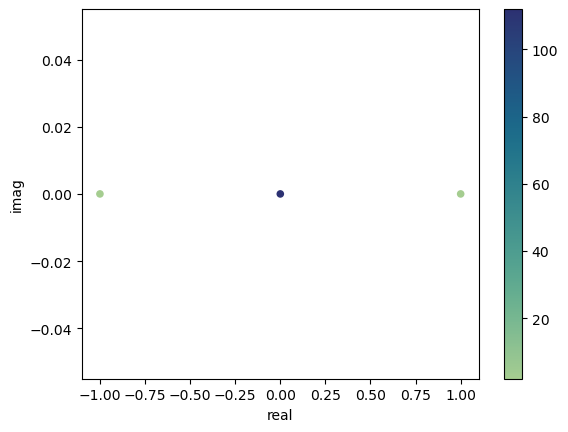

In [17]:
eigenvals = np.linalg.eigvals(nx.adjacency_matrix(g).todense())
df_eigenvals = pd.Series(eigenvals).value_counts().reset_index()
df_eigenvals.columns = ["eigenval", "multiplicity"]
df_eigenvals = df_eigenvals.assign(real=np.real(df_eigenvals.eigenval), imag=np.imag(df_eigenvals.eigenval))
ax = df_eigenvals.plot.scatter(x="real", y="imag", c=df_eigenvals.multiplicity, cmap=sns.color_palette("crest", as_cmap=True))

<AxesSubplot: >

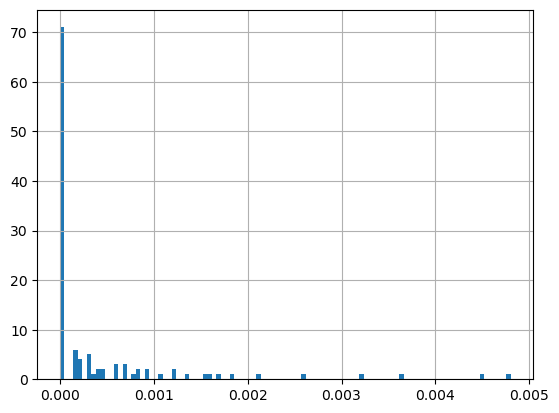

In [18]:

pd.Series(nx.betweenness.betweenness_centrality(g)).hist(bins=101)

In [8]:
from random import choice
from sympy import factorint